In [ ]:
#Importing the required modules
import numpy as np
import keras
import matplotlib 
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
#Decoding the integer sequences back into sentences
#mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
# Data Preparation

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

#Encoding the labels
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
#Reference Base Model creation
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Model compilation

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
#Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#Training the model

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

history_dict = history.history
print(history_dict.keys())

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5214 - accuracy: 0.7939 - val_loss: 0.4109 - val_accuracy: 0.8465
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3140 - accuracy: 0.9021 - val_loss: 0.3091 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2302 - accuracy: 0.9243 - val_loss: 0.2802 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1825 - accuracy: 0.9401 - val_loss: 0.2870 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1495 - accuracy: 0.9519 - val_loss: 0.2777 - val_accuracy: 0.8914
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1218 - accuracy: 0.9616 - val_loss: 0.3017 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1019 - accuracy: 0.9692 - val_loss: 0.3069 - val_accuracy: 0.8822
Epoch 8/20
30

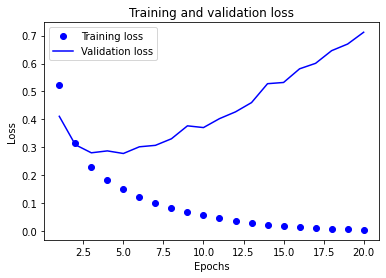

In [ ]:
#Plot the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

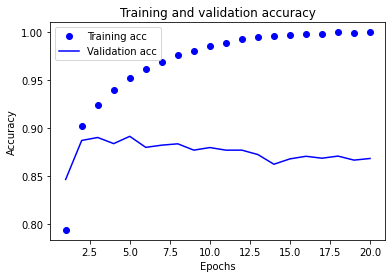

In [ ]:
#Plot the training and validation accuracy

plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Re-training the model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 3s 37ms/step - loss: 0.4502 - accuracy: 0.8206
Epoch 2/5
49/49 [==============================] - 1s 27ms/step - loss: 0.2557 - accuracy: 0.9092
Epoch 3/5
49/49 [==============================] - 1s 27ms/step - loss: 0.2010 - accuracy: 0.9266
Epoch 4/5
49/49 [==============================] - 1s 28ms/step - loss: 0.1677 - accuracy: 0.9409
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3220 - accuracy: 0.8771


In [ ]:
print(results)

[0.32204729318618774, 0.8770800232887268]


1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [ ]:
#Using three hidden layers
model_3L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Training our model

history_3L = model_3L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5437 - accuracy: 0.7730 - val_loss: 0.4099 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3249 - accuracy: 0.8969 - val_loss: 0.3084 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2253 - accuracy: 0.9246 - val_loss: 0.2952 - val_accuracy: 0.8820
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1755 - accuracy: 0.9408 - val_loss: 0.2850 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1389 - accuracy: 0.9546 - val_loss: 0.2896 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1154 - accuracy: 0.9629 - val_loss: 0.3436 - val_accuracy: 0.8765
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0917 - accuracy: 0.9721 - val_loss: 0.3320 - val_accuracy: 0.8852
Epoch 8/20
30

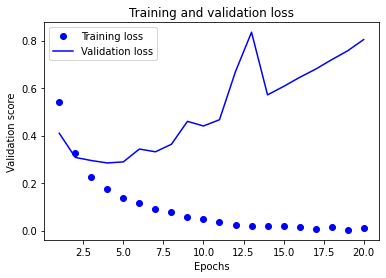

In [ ]:
# Plot the training and validation loss
history_dict_3L = history_3L.history

loss = history_3L.history['loss']
val_loss = history_3L.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()

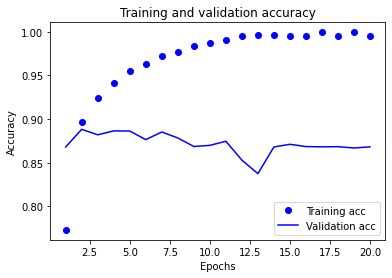

In [ ]:
# Plot the training and validation accuracy
plt.clf()
acc = history_dict_3L["accuracy"]
val_acc = history_dict_3L["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

An epoch means training the neural network with all the training data for one cycle .At fourth epoch point the validation loss is minimum and accuracy is decreasing at the fourth epoch point. This is Overfitting. To prevent overfitting, we can stop training after the fourth epoch and then we need to train a new network from scratch for those 4 ephocs inorder to evaluate it in our test data.

In [ ]:
model_3LT = models.Sequential()
model_3LT.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3LT.add(layers.Dense(16, activation='relu'))
model_3LT.add(layers.Dense(16, activation='relu'))
model_3LT.add(layers.Dense(1, activation='sigmoid'))
model_3LT.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_3LT.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model_3LT.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4803 - accuracy: 0.8107
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2625 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1976 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3085 - accuracy: 0.8812


In [ ]:
print(results1)

[0.3085187077522278, 0.8812400102615356]


We have seen a slight increase in the test accuracy when used three hidden layers.

2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [ ]:
model_2L = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
  history_2L = model_2L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4821 - accuracy: 0.7847 - val_loss: 0.3916 - val_accuracy: 0.8330
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2646 - accuracy: 0.9049 - val_loss: 0.2909 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1966 - accuracy: 0.9293 - val_loss: 0.3201 - val_accuracy: 0.8692
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1578 - accuracy: 0.9445 - val_loss: 0.2821 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1193 - accuracy: 0.9595 - val_loss: 0.3163 - val_accuracy: 0.8778
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0929 - accuracy: 0.9707 - val_loss: 0.3311 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0718 - accuracy: 0.9777 - val_loss: 0.3585 - val_accuracy: 0.8823
Epoch 8/20
30

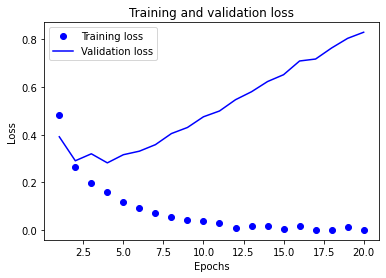

In [ ]:
history_dict_2L = history_2L.history
loss_values = history_dict_2L["loss"]
val_loss_values = history_dict_2L["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

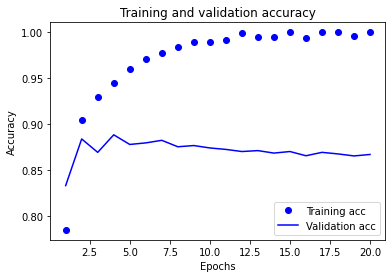

In [ ]:
plt.clf()
acc = history_dict_2L["accuracy"]
val_acc = history_dict_2L["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At fourth epoch point the validation loss is minimum and accuracy is decreasing at the fourth epoch point. This is Overfitting. To prevent overfitting, we can stop training after the fourth epoch and then we need to train a new network from scratch for those 4 ephocs inorder to evaluate it in our test data.

In [ ]:
model_2LT = models.Sequential()
model_2LT.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2LT.add(layers.Dense(64, activation='relu'))
model_2LT.add(layers.Dense(1, activation='sigmoid'))
model_2LT.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_2LT.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model_2LT.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 47ms/step - loss: 0.4149 - accuracy: 0.8238
Epoch 2/4
49/49 [==============================] - 2s 36ms/step - loss: 0.2380 - accuracy: 0.9118
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1885 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3301 - accuracy: 0.8754


In [ ]:
print(results2)

[0.3300537168979645, 0.8754400014877319]


We have seen a slight decrease in the test accuracy when used more hidden units(32,64)

3. Try using the mse loss function instead of binary_crossentropy.

In [ ]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
# Training our model

history_mse = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1760 - accuracy: 0.7855 - val_loss: 0.1248 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0961 - accuracy: 0.9017 - val_loss: 0.0942 - val_accuracy: 0.8895
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0671 - accuracy: 0.9259 - val_loss: 0.0896 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0512 - accuracy: 0.9456 - val_loss: 0.0830 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0401 - accuracy: 0.9580 - val_loss: 0.0828 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0328 - accuracy: 0.9676 - val_loss: 0.0866 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0268 - accuracy: 0.9742 - val_loss: 0.0883 - val_accuracy: 0.8806
Epoch 8/20
30

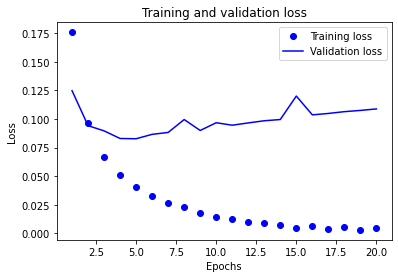

In [ ]:
# Plotting the training and validation loss
history_dict_mse = history_mse.history
loss_values = history_dict_mse["loss"]
val_loss_values = history_dict_mse["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

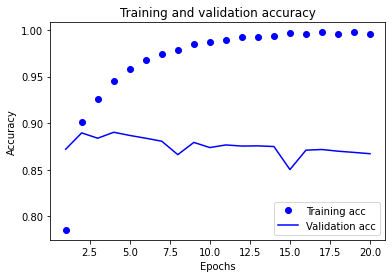

In [ ]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_mse["accuracy"]
val_acc = history_dict_mse["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At fourth epoch point the validation loss is minimum and accuracy is decreasing at the fourth epoch point. This is Overfitting. To prevent overfitting, we can stop training after the fourth epoch and then we need to train a new network from scratch for those 4 ephocs inorder to evaluate it in our test data.

In [ ]:
model_Tmse = models.Sequential()
model_Tmse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_Tmse.add(layers.Dense(16, activation='relu'))
model_Tmse.add(layers.Dense(1, activation='sigmoid'))
model_Tmse.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model_Tmse.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = model_Tmse.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.1524 - accuracy: 0.8154
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0779 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.0593 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0866 - accuracy: 0.8829


In [ ]:
print(results3)

[0.08661215007305145, 0.8829200267791748]


We have seen a slight increase in the test accuracy when used mse loss function.

4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.


In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
    ])
model_tanh.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1586 - accuracy: 0.7899 - val_loss: 0.1069 - val_accuracy: 0.8801
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0811 - accuracy: 0.9080 - val_loss: 0.0974 - val_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0550 - accuracy: 0.9364 - val_loss: 0.0825 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0421 - accuracy: 0.9519 - val_loss: 0.0826 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0323 - accuracy: 0.9623 - val_loss: 0.0869 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0241 - accuracy: 0.9727 - val_loss: 0.0951 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0197 - accuracy: 0.9783 - val_loss: 0.1123 - val_accuracy: 0.8576
Epoch 8/20
30

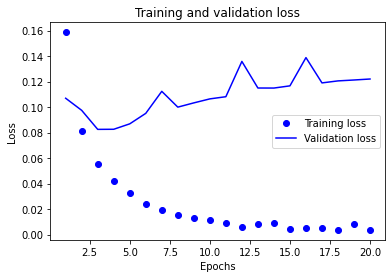

In [ ]:
history_dict_tanh = history_tanh.history
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

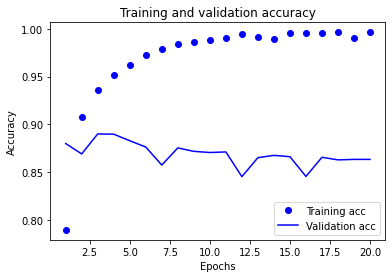

In [ ]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At third epoch point the validation loss is minimum and accuracy is decreasing at the third epoch point. This is Overfitting. To prevent overfitting, we can stop training after the third epoch and then we need to train a new network from scratch for those 3 ephocs inorder to evaluate it in our test data.

In [ ]:
model_Ttanh = models.Sequential()
model_Ttanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_Ttanh.add(layers.Dense(16, activation='tanh'))
model_Ttanh.add(layers.Dense(1, activation='sigmoid'))
model_Ttanh.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_Ttanh.fit(x_train, y_train, epochs=3, batch_size=512)
results4 = model_Ttanh.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 28ms/step - loss: 0.4318 - accuracy: 0.8271
Epoch 2/3
49/49 [==============================] - 1s 26ms/step - loss: 0.2386 - accuracy: 0.9155
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2974 - accuracy: 0.8815


In [ ]:
print(results4)

[0.29738688468933105, 0.8814799785614014]


We have seen a slight increase in the test accuracy when used tanh activation.

5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [ ]:
from keras import models
from keras import layers
model_D = models.Sequential()
model_D.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_D.add(layers.Dropout(0.3))
model_D.add(layers.Dense(16, activation='relu'))
model_D.add(layers.Dropout(0.3))
model_D.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_D.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history_D = model_D.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5933 - accuracy: 0.6887 - val_loss: 0.4514 - val_accuracy: 0.8541
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4283 - accuracy: 0.8334 - val_loss: 0.3514 - val_accuracy: 0.8785
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3333 - accuracy: 0.8829 - val_loss: 0.2931 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2721 - accuracy: 0.9098 - val_loss: 0.2759 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2259 - accuracy: 0.9295 - val_loss: 0.2694 - val_accuracy: 0.8920
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1878 - accuracy: 0.9402 - val_loss: 0.2883 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1572 - accuracy: 0.9522 - val_loss: 0.2981 - val_accuracy: 0.8873
Epoch 8/20
30

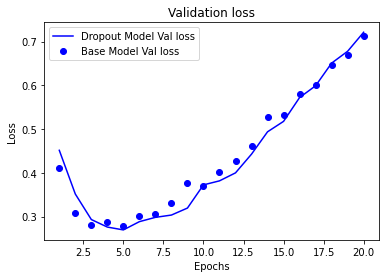

In [ ]:
# Plot the training and validation loss
history_dict_D = history_D.history
val_loss_values = history_dict_D["val_loss"]
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, val_loss_values, "b", label="Dropout Model Val loss")
plt.plot(epochs, history_dict["val_loss"], "bo", label="Base Model Val loss")
plt.title("Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

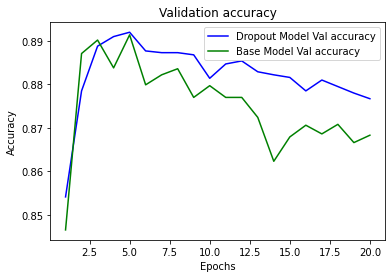

In [ ]:
# Plot the training and validation accuracy
plt.clf()

history_dict_D = history_D.history
val_acc = history_dict_D["val_accuracy"]
plt.plot(epochs, val_acc, "b", label="Dropout Model Val accuracy")
plt.plot(epochs, history_dict["val_accuracy"], "g", label="Base Model Val accuracy")
plt.title("Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Dropout regularization is a technique to prevent neural networks from overfitting. Dropout works by randomly disabling neurons and their corresponding connections. This prevents the network from relying too much on single neurons and forces all neurons to learn to generalize better resulting in increasing the performance of the network and prevents overfitting.